In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [8.0,6.0]

from classy_sz import Class
import os


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [12]:
# snrcut = 7
# from classy_sz import Class

cluster_settings = {

          'non_linear': 'halofit',
          'output' : 'sz_cluster_counts',
          'mass function' : 'M500',

          'has_selection_function' : 1,
          'experiment' : 0, # Planck
          'y_m_relation' : 0,
          'signal-to-noise cut-off for survey cluster completeness' : 6.,
          'use_planck_binned_proba' : 1,

          'M_min' : 5e13,
          'M_max' : 5e15,

          'z_min': 0.,
          'z_max': 1.,

          'tau_reio': 0.054, # planck 2018 value (in abstract of 1807.06209)
          'YHe': 'BBN',

          # 1 massive neutrino (planck 2018 baseline)
          'N_ur': 2.0328,
          'N_ncdm': 1,
          'm_ncdm': 0.06,
          'T_ncdm': 0.71611,

          #
          # #3 massive neutrinos
          # N_ur : 0.00641
          # N_ncdm : 1
          # deg_ncdm : 3
          # m_ncdm : 0.02
          # T_ncdm : 0.71611



          # verbose parameters for debugging
          'input_verbose' : 0,
          'background_verbose': 0,
          'perturbations_verbose': 0,
          # class_sz_verbose  : 0




          'bin_z_min_cluster_counts' : 0.,
          'bin_z_max_cluster_counts' : 1.,
          'bin_dz_cluster_counts' : 0.1,
          'bin_dlog10_snr': 0.25,

          'dlny' : 0.01,
          'lnymin' : -11.,
          'lnymax' : -5.,
          'sigmaM_ym' : 0.173,


          'dlnM_cluster_count_completeness_grid' : 0.03,


          'cluster_count_completeness_grid_z_cutoff_low' : 0.5,
          'cluster_count_completeness_grid_z_cutoff_mid' : 1.5,
          'dz_cluster_count_completeness_grid_low_z' : 5e-3,
          'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
          'dz_cluster_count_completeness_grid_high_z' : 1e-1,

          'mass_epsrel_cluster_counts' : 1e-3,
          'mass_epsabs_cluster_counts' : 1e-30,

          'redshift_epsrel_cluster_counts' : 1e-3,
          'redshift_epsabs_cluster_counts' : 1e-30,



          #
          #
          # # tabulation of mass function:
          'n_z_dndlnM' : 80,
          'n_m_dndlnM' : 80,
          #
          # # computation of mass function
          # # (grid in mass and redshifts for sigma and dsigma)
          'ndim_masses' : 80,
          'ndim_redshifts' : 80,
          #
          # pk setup for computation of sigma and dsigma
          'k_per_decade_class_sz' : 20.,
          'k_min_for_pk_class_sz' : 1e-3,
          'k_max_for_pk_class_sz' : 1e1,

          'P_k_max_h/Mpc' : 1e1,

          'class_sz_verbose': 0

}


parameters_settings = {
          # X ray mass bias (if applicable)
          'B' : 1.71,
          'H0' : 67.,
          'sigma8': 0.84,
          'Omega_b': 0.04,
          'Omega_cdm': 0.26
    
}

In [13]:
# try:
#     cluster_settings.pop('non linear')
# except KeyError:
#     print('fine')
# cluster_settings['output'] = 'sz_cluster_counts'

In [14]:
M = Class()
M.set(cluster_settings)
M.set(parameters_settings)
M.compute()
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())

# szcountsf90:
#[evaluate]  sigma8 = 0.810188
#[evaluate]  omegam = 0.309952
#[evaluate]  H0 = 68.0053

h : 0.670000
sigma8 : 0.840000
Omega_m : 0.301435
n_s : 0.961900


In [15]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

In [16]:
np.sum(dNdzdy_theoretical)

426.7948698302745

In [17]:
10**np.asarray(log10y_center)

array([ 6.68343918, 11.88502227, 21.1348904 , 37.58374043])

In [18]:
np.asarray(z_center)

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

In [19]:
N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz][:-1]))
N_clusters_y_theory = []
for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))


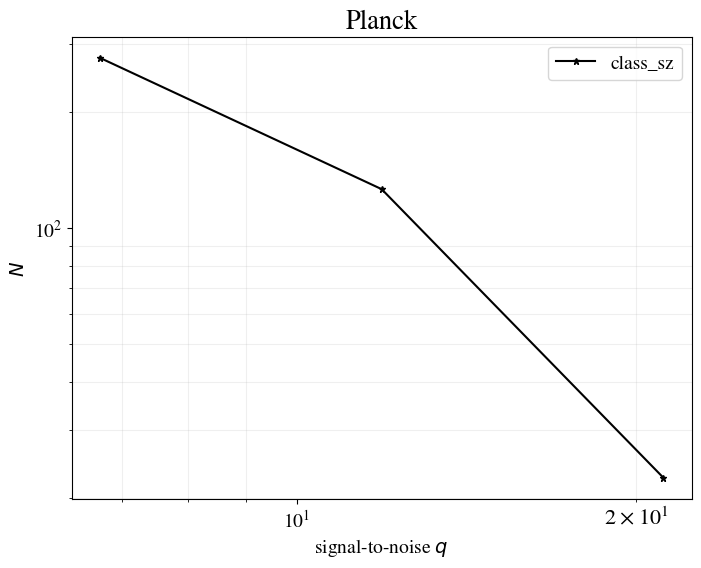

In [20]:
plt.figure(figsize=(8,6))

plt.plot(10**np.asarray(log10y_center[:-1]),N_clusters_y_theory[:-1],
             marker='*',markersize=5.,ls='-',label='class_sz',c='k')

# plt.ylim(7e-2,1e4)
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(which = 'both',alpha = 0.2)
plt.title('Planck')
plt.grid()
plt.show()

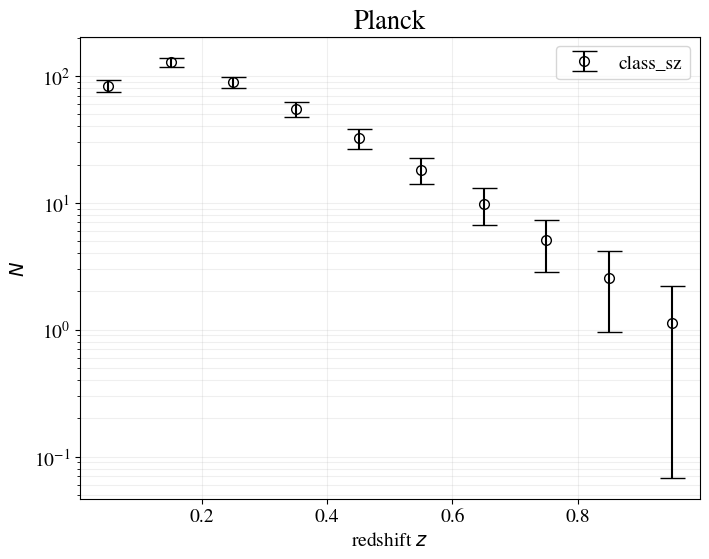

In [21]:
plt.figure(figsize=(8,6))

plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),marker='o',markersize=7.,ls='none',
             label='class_sz',capsize=9,
             markerfacecolor='none',
             c='k')


plt.xlabel('redshift $z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('linear')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
# plt.ylim(1e-2,2e3)
plt.grid(which = 'both',alpha = 0.2)
plt.title('Planck')
plt.show()

# read-in the planck catalogue:


In [22]:
from soliket.sz_binned_cluster_counts.binned_cc import binned_cc_likelihood
soliket_lkl = binned_cc_likelihood

soliket_lkl.tcat_file =  'SZ_cat.txt'
soliket_lkl.snrcut =  6.
soliket_lkl.experiment =  'Planck'

soliket_lkl.bin_z_min_cluster_counts  =  0.
soliket_lkl.bin_z_max_cluster_counts  =  1.
soliket_lkl.bin_dz_cluster_counts  =  0.1
soliket_lkl.bin_dlog10_snr =  0.25
soliket_lkl.debug =  True

In [24]:
# here copy the planck likelihood initialize from soliket:
def initialize(self):
    SZ_catalog = np.loadtxt(os.path.join(self.data_directory, self.tcat_file))
    if self.experiment == 'Planck':
        SZ_catalog = np.loadtxt(os.path.join(self.data_directory, self.tcat_file))
        if self.debug:
            print("starting setting up catalogue data")
        # print(self.theory.extra_args['M_min'])
            print(self.bin_z_min_cluster_counts)

        # exit(0)

        z_0 = self.bin_z_min_cluster_counts;
        z_max = self.bin_z_max_cluster_counts;
        dz = self.bin_dz_cluster_counts;
        Nbins_z = int((z_max - z_0)/dz)
        z_center = np.zeros(Nbins_z)


        # class_alloc(pcsz->z_center,pcsz->Nbins_z*sizeof(double),pcsz->error_message);
        # int index_z;
        for index_z in range(Nbins_z):
            z_center[index_z] = z_0 + 0.5*dz + index_z*dz;
            if self.debug:
                print("z_center:",z_center[index_z])
            # print("index_z=%d, z_center=%e\n"%(index_z,z_center[index_z]))

        logy_min =  0.7 # set for planck
        logy_max = 1.5 # set for planck
        dlogy = self.bin_dlog10_snr
        #
        Nbins_y = int((logy_max - logy_min)/dlogy)+1
        if self.debug:
            print('Nbins_y:',Nbins_y,self.bin_dlog10_snr)
        logy = np.zeros(Nbins_y)
        y_i = logy_min + dlogy/2.
        for index_y in range(Nbins_y):
            logy[index_y] = y_i
            y_i += dlogy
            if self.debug:
                print("y_center:",index_y,Nbins_y,10**logy[index_y])

        self.dNdzdy_catalog = np.zeros([Nbins_z,Nbins_y])

        nrows = len(SZ_catalog[:,0])
        if self.debug:
            print('number of rows in catalogue:',nrows)


        zmin = z_0
        zmax = zmin +dz
        # Count the number of clusters in each (z,y) bin
        for i in range (Nbins_z):
            for j in range (Nbins_y):
                y_min = logy[j]-dlogy/2.
                y_max = logy[j]+dlogy/2.
                y_min = 10**y_min
                y_max = 10**y_max
                # if j == Nbins_y:
                #     y_max = 1e100

                for ii in range(0,nrows):
                    if (SZ_catalog[ii][0]>=zmin) and (SZ_catalog[ii][0]<zmax)\
                       and (SZ_catalog[ii][2]<y_max) and (SZ_catalog[ii][2]>=y_min):
                        self.dNdzdy_catalog[i][j] += 1.
            # Count the number of clusters in the last y bin for each z bin
            # j = Nbins_y
            # y_min =y_max
            # for ii in range(0,nrows):
            #     if (SZ_catalog[ii][0]>=zmin) and (SZ_catalog[ii][0]<zmax)\
            #        and (SZ_catalog[ii][2]>=y_min):
            #         self.dNdzdy_catalog[i][j] += 1.
            # Change edges of the redshift bin
            zmin += dz
            zmax += dz

        # Count the number of clusters in each y bin with missing redshifts and apply normalization
        for j in range(0,Nbins_y):
            y_min = logy[j]-dlogy/2.
            y_max = logy[j]+dlogy/2.
            y_min = 10**y_min
            y_max = 10**y_max
            for ii in range(0,nrows):
                if (SZ_catalog[ii][0]==-1) \
                   and (SZ_catalog[ii][2]<y_max) and (SZ_catalog[ii][2]>=y_min):
                    norm = 0
                    for jj in range(0,Nbins_z):
                        norm += self.dNdzdy_catalog[jj][j]
                    self.dNdzdy_catalog[:,j] *= (1.+norm)/norm

        # # Count the number of clusters in the last y bin with missing redshifts and apply normalization
        # j = Nbins_y
        # y_min =y_max
        # for ii in range(0,nrows):
        #     if (SZ_catalog[ii][0]==-1) and (SZ_catalog[ii][2]>=y_min):
        #         norm = 0.
        #         for jj in range(0,Nbins_z):
        #             norm += self.dNdzdy_catalog[jj][j]
        #         self.dNdzdy_catalog[:,j] *= (1.+norm)/norm
        if self.debug:
            print("Ntot cat:",np.sum(self.dNdzdy_catalog[:,:]))
        # exit(0)



In [25]:
initialize(soliket_lkl)

starting setting up catalogue data
0.0
z_center: 0.05
z_center: 0.15000000000000002
z_center: 0.25
z_center: 0.35000000000000003
z_center: 0.45
z_center: 0.55
z_center: 0.6500000000000001
z_center: 0.7500000000000001
z_center: 0.8500000000000001
z_center: 0.9500000000000001
Nbins_y: 4 0.25
y_center: 0 4 6.6834391756861455
y_center: 1 4 11.885022274370183
y_center: 2 4 21.134890398366466
y_center: 3 4 37.583740428844415
number of rows in catalogue: 438
Ntot cat: 438.0


In [26]:
soliket_lkl.dNdzdy_catalog

array([[57.2398524 , 34.        , 10.        ,  6.        ],
       [61.32841328, 32.        ,  9.        ,  0.        ],
       [71.5498155 , 31.        ,  7.        ,  0.        ],
       [49.06273063, 14.        ,  2.        ,  0.        ],
       [18.39852399, 12.        ,  0.        ,  0.        ],
       [13.28782288,  2.        ,  0.        ,  0.        ],
       [ 4.08856089,  0.        ,  0.        ,  0.        ],
       [ 1.02214022,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.        ,  0.        ,  0.        ],
       [ 1.02214022,  0.        ,  0.        ,  0.        ]])

In [27]:
Nq_cat = np.sum(soliket_lkl.dNdzdy_catalog,axis=0)

In [28]:
Nz_cat = np.sum(soliket_lkl.dNdzdy_catalog,axis=1)

# Plot planck catalogue against class_sz prediction

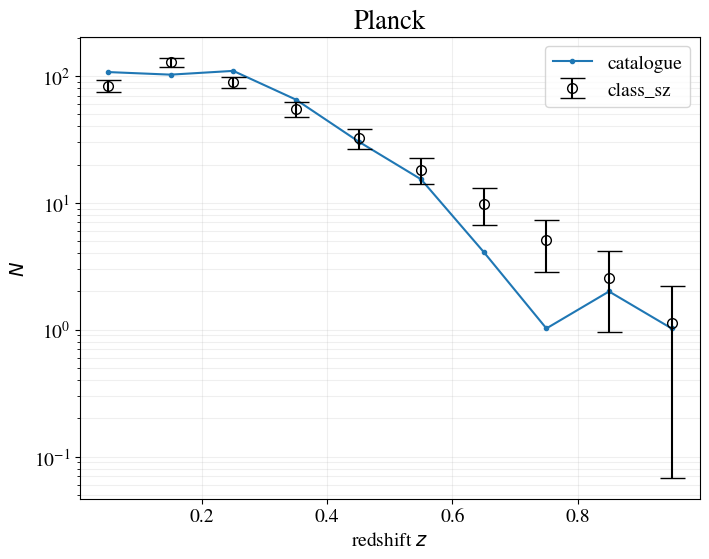

In [29]:
plt.figure(figsize=(8,6))


plt.plot(z_center,Nz_cat,label='catalogue',marker='.')
plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),marker='o',markersize=7.,ls='none',
             label='class_sz',capsize=9,
             markerfacecolor='none',
             c='k')


plt.xlabel('redshift $z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('linear')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
# plt.ylim(1e-2,2e3)
plt.grid(which = 'both',alpha = 0.2)
plt.title('Planck')
plt.show()

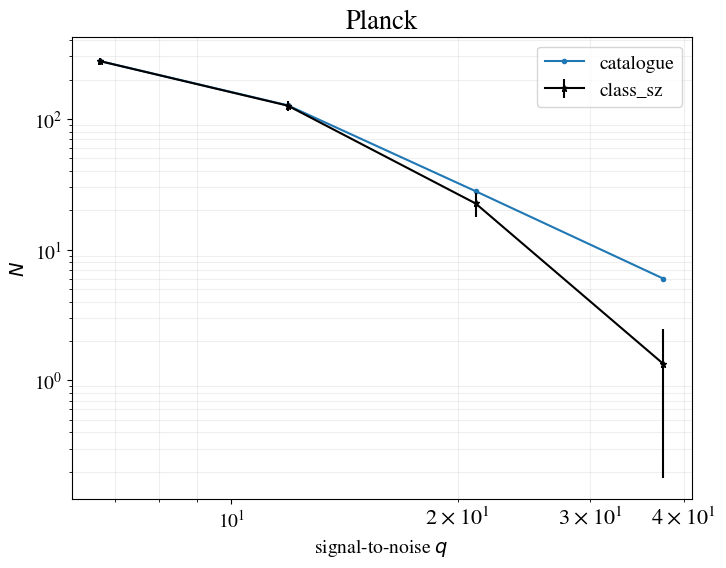

In [31]:
plt.figure(figsize=(8,6))

plt.plot(10**np.asarray(log10y_center),Nq_cat,label='catalogue',marker='.')
plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),
             marker='*',markersize=5.,ls='-',label='class_sz',c='k')

# plt.ylim(7e-2,1e4)
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(which = 'both',alpha = 0.2)
plt.title('Planck')
plt.grid()
plt.show()

In [66]:
Nq_cat

array([277., 127.,  28.,   6.,   0.])

In [61]:
10**np.asarray(log10y_center[:-1])

array([ 6.68343918, 11.88502227, 21.1348904 , 37.58374043])

In [62]:
N_z,N_y = np.shape(dNdzdy_theoretical)

In [63]:
N_z,N_y

(10, 5)